Instalamos RAPIDS (para utilizar la librería de CUML)

In [1]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 395 (delta 92), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (395/395), 108.50 KiB | 1.11 MiB/s, done.
Resolving deltas: 100% (194/194), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Obtenemos los datos

In [2]:
!wget https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip

--2023-11-12 23:53:45--  https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Resolving datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)... 201.98.60.146
Connecting to datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)|201.98.60.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18045440 (17M) [application/x-zip-compressed]
Saving to: ‘datos_abiertos_covid19.zip’

datos_abiertos_covi 100%[===================>]  17.21M  4.05MB/s    in 4.2s    

2023-11-12 23:53:50 (4.05 MB/s) - ‘datos_abiertos_covid19.zip’ saved [18045440/18045440]



In [3]:
!unzip /content/datos_abiertos_covid19.zip

Archive:  /content/datos_abiertos_covid19.zip
  inflating: COVID19MEXICO.csv       


In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('COVID19MEXICO.csv')
data

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-11-07,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,México,97,97
1,2023-11-07,6cef7b,2,12,7,1,7,7,108,1,...,2,2,97,2,97,6,99,México,97,97
2,2023-11-07,e72a0b,1,12,21,1,21,21,140,1,...,1,2,97,1,1,3,99,México,97,97
3,2023-11-07,dcee4a,1,6,11,1,11,11,20,1,...,1,2,97,1,1,3,99,México,97,97
4,2023-11-07,6236e4,2,12,9,2,9,9,9,1,...,1,2,97,1,1,3,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186689,2023-11-07,m00ee10,2,12,15,2,30,15,33,1,...,99,2,97,1,2,7,99,México,97,97
1186690,2023-11-07,m1cc581,2,3,15,1,20,15,999,1,...,99,2,97,1,2,7,99,México,97,97
1186691,2023-11-07,m0b0348,2,12,15,1,9,15,999,1,...,99,2,97,1,2,7,99,México,97,97
1186692,2023-11-07,m08f43c,2,3,15,2,15,15,999,1,...,99,2,97,1,2,7,99,México,97,97


In [5]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186694 entries, 0 to 1186693
Data columns (total 40 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   FECHA_ACTUALIZACION    1186694 non-null  object
 1   ID_REGISTRO            1186694 non-null  object
 2   ORIGEN                 1186694 non-null  int64 
 3   SECTOR                 1186694 non-null  int64 
 4   ENTIDAD_UM             1186694 non-null  int64 
 5   SEXO                   1186694 non-null  int64 
 6   ENTIDAD_NAC            1186694 non-null  int64 
 7   ENTIDAD_RES            1186694 non-null  int64 
 8   MUNICIPIO_RES          1186694 non-null  int64 
 9   TIPO_PACIENTE          1186694 non-null  int64 
 10  FECHA_INGRESO          1186694 non-null  object
 11  FECHA_SINTOMAS         1186694 non-null  object
 12  FECHA_DEF              1186694 non-null  object
 13  INTUBADO               1186694 non-null  int64 
 14  NEUMONIA               1186694 non

Eliminamos las columnas que no agregan peso al modelo

In [7]:
df = data
df = df.drop(columns=['SECTOR','MUNICIPIO_RES','HABLA_LENGUA_INDIG','ID_REGISTRO','ORIGEN','PAIS_NACIONALIDAD','PAIS_ORIGEN','INDIGENA','ENTIDAD_UM','ENTIDAD_NAC','NACIONALIDAD','ENTIDAD_RES'])
df.columns

Index(['FECHA_ACTUALIZACION', 'SEXO', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'UCI'],
      dtype='object')

Obtenemos nuevas características

In [8]:
#Pasamos las fechas a formato/tipo de fechas
df['FECHA_ACTUALIZACION'] = pd.to_datetime(df['FECHA_ACTUALIZACION'])
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])
#la parte de abajo maraca error sin errors debido a que las defunciones las maneja de otra forma
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'],errors='coerce') #para NaT

In [9]:
df

,FECHA_ACTUALIZACION,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,EMBARAZO,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
0,2023-11-07,2,1,2023-03-09,2023-03-06,NaT,97,2,28,97,...,2,1,2,2,97,1,2,7,99,97
1,2023-11-07,1,1,2023-01-16,2023-01-14,NaT,97,2,54,2,...,2,2,2,2,97,2,97,6,99,97
2,2023-11-07,1,1,2023-02-27,2023-02-26,NaT,97,2,65,2,...,2,2,1,2,97,1,1,3,99,97
3,2023-11-07,1,1,2023-03-25,2023-03-22,NaT,97,2,62,2,...,2,2,1,2,97,1,1,3,99,97
4,2023-11-07,2,1,2023-01-23,2023-01-23,NaT,97,2,40,97,...,2,2,1,2,97,1,1,3,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186689,2023-11-07,2,1,2023-08-30,2023-08-30,NaT,97,99,61,97,...,2,2,99,2,97,1,2,7,99,97
1186690,2023-11-07,1,1,2023-08-30,2023-08-30,NaT,97,99,61,2,...,2,2,99,2,97,1,2,7,99,97
1186691,2023-11-07,1,1,2023-08-30,2023-08-30,NaT,97,99,39,2,...,2,2,99,2,97,1,2,7,99,97
1186692,2023-11-07,2,1,2023-08-31,2023-08-31,NaT,97,99,66,97,...,2,2,99,2,97,1,2,7,99,97


In [10]:
#Se usa para proceder a usar Label Encoder
for col in ['TIPO_PACIENTE']:
  df[col] = df[col].astype(str)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['TIPO_PACIENTE','SEXO']:
  df[col] = le.fit_transform(df[col])

In [13]:
#Ya no necesitamos los siguientes objetos, tambien df['DIAS_DEFUNCION']
df = df.drop(columns=['FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF','DIAS_DEFUNCION', 'MIGRANTE'])

In [14]:
df.CLASIFICACION_FINAL.value_counts() #Se plantea eliminar los dos valores más bajos (2 y 4) y recorrer los valores

7    692424
3    419475
6     64459
1      7969
5      2177
4       164
2        26
Name: CLASIFICACION_FINAL, dtype: int64

In [15]:
df[['CLASIFICACION_FINAL']] = df[['CLASIFICACION_FINAL']].replace([2,4],10) #los valores a quitar se etiquetan de cualquier forma para posteriormente quitarlos

In [16]:
df.CLASIFICACION_FINAL.value_counts()

7     692424
3     419475
6      64459
1       7969
5       2177
10       190
Name: CLASIFICACION_FINAL, dtype: int64

In [17]:
df[df['CLASIFICACION_FINAL']==10].index #íncides correspondientes para hacer drop

Int64Index([   6143,   11231,   17717,   20803,   22254,   31539,   45128,
              45886,   47050,   57839,
            ...
            1182811, 1182836, 1182886, 1182916, 1182928, 1182967, 1183445,
            1184251, 1185950, 1186269],
           dtype='int64', length=190)

In [18]:
df.drop(df[df['CLASIFICACION_FINAL']==10].index.values, inplace = True) #Quitamos los elementos 2 y 4

In [19]:

df.CLASIFICACION_FINAL.value_counts() #Verificamos que no estén los valores 2 y 4 para posteriormente recorrer los valores

7    692424
3    419475
6     64459
1      7969
5      2177
Name: CLASIFICACION_FINAL, dtype: int64

Recordar que los índices después del drop No se recorren, pero se puede hacer.

In [20]:
df['CLASIFICACION_FINAL'].replace([3,5,6,7],[2,3,4,5], inplace = True) #Se reemplzan los valores (recorren) por los indicados

In [21]:
df.CLASIFICACION_FINAL.value_counts()

5    692424
2    419475
4     64459
1      7969
3      2177
Name: CLASIFICACION_FINAL, dtype: int64

In [22]:
X = df.drop(columns=['CLASIFICACION_FINAL'])
y = df['CLASIFICACION_FINAL']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle = True)

In [24]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


Random Forest, RandomForestClassifier()
Modelo resultados
              precision    recall  f1-score   support

           1       0.86      0.01      0.02      1555
           2       1.00      1.00      1.00     83874
           3       0.64      0.20      0.31       421
           4       0.95      0.97      0.96     12848
           5       0.99      1.00      0.99    138603

    accuracy                           0.99    237301
   macro avg       0.89      0.64      0.65    237301
weighted avg       0.99      0.99      0.99    237301



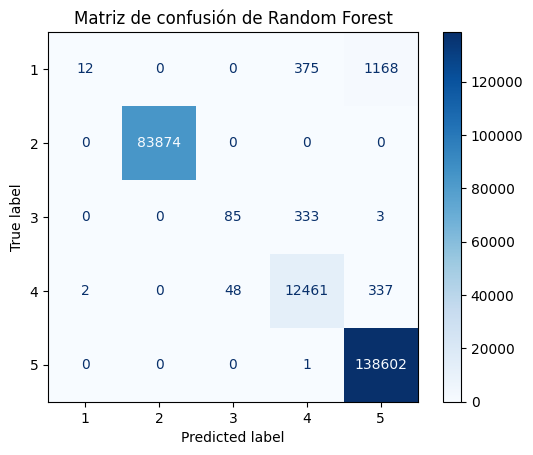

KNN, KNeighborsClassifier()
Modelo resultados
              precision    recall  f1-score   support

           1       0.23      0.01      0.02      1555
           2       0.95      0.85      0.90     83874
           3       0.45      0.03      0.06       421
           4       0.96      0.92      0.94     12848
           5       0.90      0.97      0.93    138603

    accuracy                           0.92    237301
   macro avg       0.70      0.56      0.57    237301
weighted avg       0.91      0.92      0.91    237301



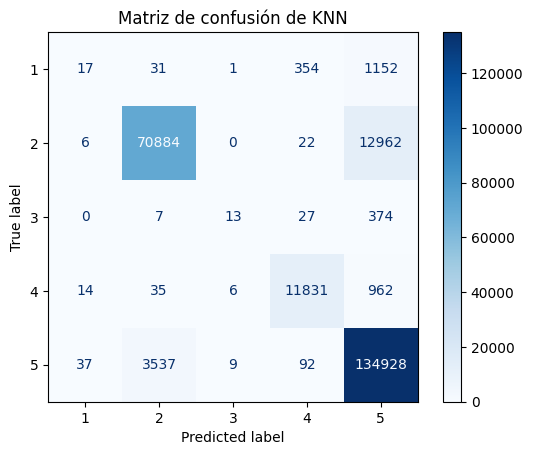

SVM, SVC()
Modelo resultados


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.65      0.01      0.01      1555
           2       1.00      0.73      0.84     83874
           3       0.00      0.00      0.00       421
           4       0.97      0.90      0.93     12848
           5       0.85      1.00      0.92    138603

    accuracy                           0.89    237301
   macro avg       0.69      0.53      0.54    237301
weighted avg       0.90      0.89      0.88    237301



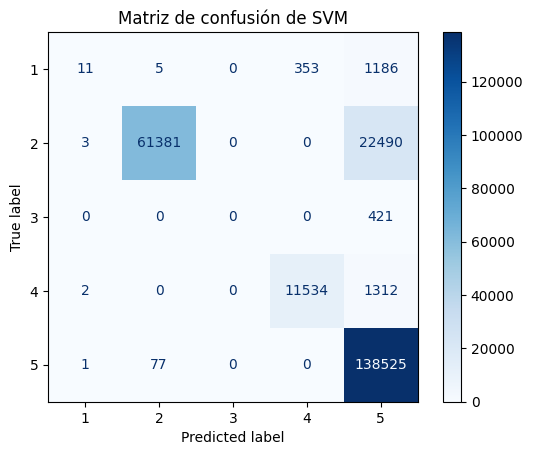

In [29]:
import cuml
from cuml.ensemble import RandomForestClassifier
from cuml.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from cuml.svm import SVC

cuml_RFC = RandomForestClassifier(random_state=42)
cuml_KNC = KNeighborsClassifier()
cuml_SVC = SVC() #Kernel default 'rbf'

classifiers = [('Random Forest', cuml_RFC),('KNN', cuml_KNC), ('SVM', cuml_SVC)]

for name, clf in classifiers:
  print(f'{name}, {clf}')
  clf.fit(X_train,y_train)
  y_predict = clf.predict(X_test)
  print(f'Modelo resultados')
  print(classification_report(y_test,y_predict))
  disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
  disp.ax_.set_title('Matriz de confusión de ' + name)
  plt.show()

Modelo resultados


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.65      0.01      0.01      1555
           2       1.00      0.73      0.84     83874
           3       0.00      0.00      0.00       421
           4       0.97      0.90      0.93     12848
           5       0.85      1.00      0.92    138603

    accuracy                           0.89    237301
   macro avg       0.69      0.53      0.54    237301
weighted avg       0.90      0.89      0.88    237301



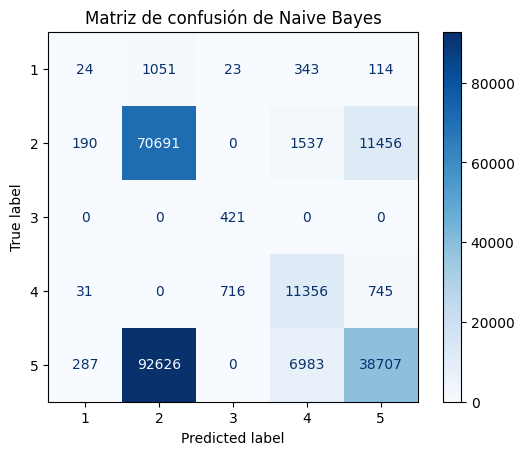

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(f'Modelo resultados')
print(classification_report(y_test,y_predict))
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title('Matriz de confusión de Naive Bayes')
plt.show()

### PCA

In [31]:
from cuml.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Escalamiento

In [32]:
ss = StandardScaler()
pca = PCA()

In [33]:
X_train_scaled = ss.fit_transform(X_train)

[W] [00:04:35.054980] Warning(`fit`): As of v0.16, PCA invoked without an n_components argument defaults to using min(n_samples, n_features) rather than 1


Text(0, 0.5, 'cumulative explained variance')

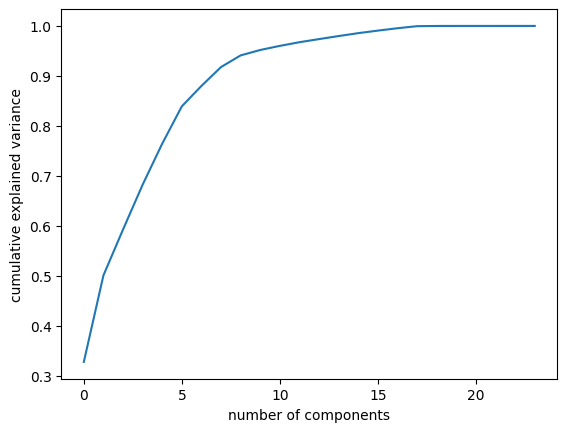

In [34]:
#Ploteamos el número de componentes así como la varianza acumulada.
pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Utilizaremos 18 componentes

In [35]:
X_test_scaled = ss.transform(X_test)
# Crear una nueva instancia de PCA con el número deseado de componentes
pca_final = PCA(n_components=18)

# Ajustar (fit) PCA a los datos de entrenamiento escalados
X_train_final = pca_final.fit_transform(X_train_scaled)

# Transformar los datos de prueba usando los componentes finales
X_test_final = pca_final.transform(X_test_scaled)


Repetimos el código con PCA (15) para ver si existe una mejora

Random Forest, RandomForestClassifier()
Modelo resultados
              precision    recall  f1-score   support

           1       0.52      0.01      0.02      1555
           2       0.82      0.54      0.65     83874
           3       0.00      0.00      0.00       421
           4       0.97      0.90      0.93     12848
           5       0.76      0.93      0.83    138603

    accuracy                           0.78    237301
   macro avg       0.61      0.48      0.49    237301
weighted avg       0.79      0.78      0.77    237301



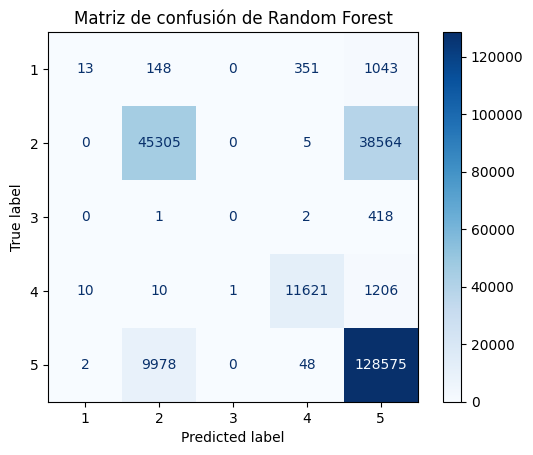

KNN, KNeighborsClassifier()
Modelo resultados
              precision    recall  f1-score   support

           1       0.22      0.01      0.03      1555
           2       0.83      0.76      0.79     83874
           3       0.06      0.01      0.01       421
           4       0.96      0.91      0.93     12848
           5       0.85      0.91      0.88    138603

    accuracy                           0.85    237301
   macro avg       0.58      0.52      0.53    237301
weighted avg       0.84      0.85      0.84    237301



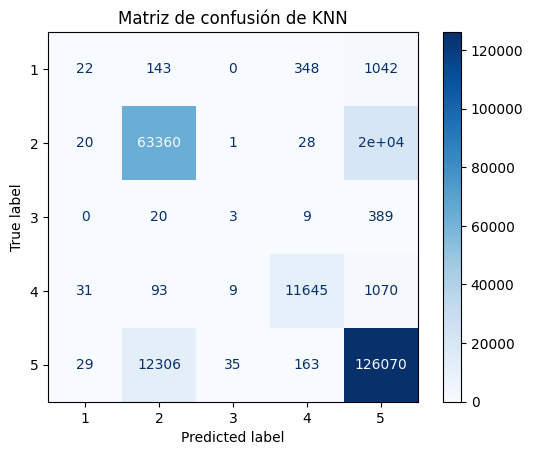

SVM, SVC()
Modelo resultados


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.92      0.01      0.01      1555
           2       1.00      0.90      0.95     83874
           3       0.00      0.00      0.00       421
           4       0.97      0.90      0.93     12848
           5       0.92      1.00      0.96    138603

    accuracy                           0.95    237301
   macro avg       0.76      0.56      0.57    237301
weighted avg       0.95      0.95      0.95    237301



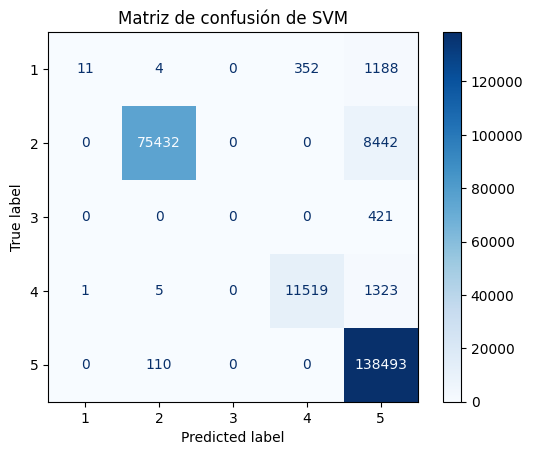

In [36]:
for name, clf in classifiers:
  print(f'{name}, {clf}')
  clf.fit(X_train_final,y_train)
  y_predict = clf.predict(X_test_final)
  print(f'Modelo resultados')
  print(classification_report(y_test,y_predict))
  disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test_final,
        y_test,
        cmap=plt.cm.Blues
    )
  disp.ax_.set_title('Matriz de confusión de '+ name)
  plt.show()

Modelo resultados


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.92      0.01      0.01      1555
           2       1.00      0.90      0.95     83874
           3       0.00      0.00      0.00       421
           4       0.97      0.90      0.93     12848
           5       0.92      1.00      0.96    138603

    accuracy                           0.95    237301
   macro avg       0.76      0.56      0.57    237301
weighted avg       0.95      0.95      0.95    237301



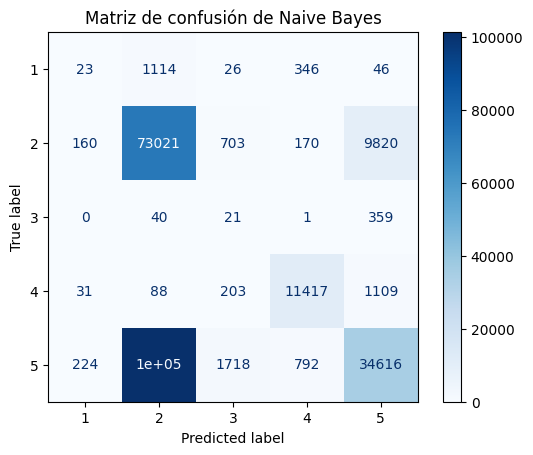

In [37]:
model.fit(X_train_final,y_train)
y_predict = clf.predict(X_test_final)
print(f'Modelo resultados')
print(classification_report(y_test,y_predict))
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test_final,
        y_test,
        cmap=plt.cm.Blues
    )
disp.ax_.set_title('Matriz de confusión de Naive Bayes')
plt.show()

### Conclusión

Mediante las observaciones de la matriz de confusión podmeos observar que el clasificador Random Forest con todas los predictores, es decir, sin disminuir la dimensionalidad de el data set, fue el el mejor.

# Gradio

In [38]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

### Al parecer se necesita crear un entorno virtual para usar Gradio

In [42]:
!pip install --upgrade pip
!pip install --upgrade setuptools


In [43]:
!pip install gradio

In [44]:
import gradio as gr


ImportError: ignored

Debido al análisis anterior seleccionamos al algoritmo que tuvo mejor comportamiento, a saber Random Forest Classifier.

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
#y_predict = clf.predict(X_test)
#print(classification_report(y_test,y_predict))

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np


def predict(sexo, tipo_paciente, intubado, neumonia, edad, embarazo,
             diabetes, epoc, asma, inmusupr,
            hipertension, otra_com, cardiovascular, obesidad,
            renal_cronica, tabaquismo, otro_caso, toma_muestra_lab,
            resultado_lab, toma_muestra_antigeno, resultado_antigeno,
           uci, dias_hospitalizacion, dias_sintomas):


    # Crea un DataFrame con los valores de entrada
    input_data = pd.DataFrame([[
        sexo, tipo_paciente, intubado, neumonia, edad, embarazo,
       diabetes, epoc, asma, inmusupr,
        hipertension, otra_com, cardiovascular, obesidad,
        renal_cronica, tabaquismo, otro_caso, toma_muestra_lab,
        resultado_lab, toma_muestra_antigeno, resultado_antigeno, uci, dias_hospitalizacion, dias_sintomas
        ]], columns=[
        'SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO','DIABETES', 'EPOC',
        'ASMA', 'INMUSUPR','HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD','RENAL_CRONICA',
        'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB','RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO',
        'RESULTADO_ANTIGENO','UCI', 'DIAS_HOSPITALIZACION', 'DIAS_SINTOMAS'])

    prediction = clf.predict(input_data)
    return prediction




gr.Row
inputs = [
    gr.Radio(choices=[0, 1], label='Sexo'),
    gr.Radio(choices=[0, 1], label='Tipo de Paciente'),
    gr.Radio(choices=[0, 1, 97, 98, 99], label='Intubado'),
    gr.Radio(choices=[0, 1, 97, 98, 99], label='Neumonía'),
    gr.Slider(minimum=0, maximum=120, value=30, label='Edad'),
    gr.Radio(choices=[1, 2, 97, 98, 99], label='Embarazo'),
    gr.Radio(choices=[1, 2, 98], label='Diabetes'),
    gr.Radio(choices=[1, 2, 98], label='EPOC'),
    gr.Radio(choices=[1, 2, 98], label='Asma'),
    gr.Radio(choices=[1, 2, 98], label='Inmunosupresión'),
    gr.Radio(choices=[1, 2, 98], label='Hipertensión'),
    gr.Radio(choices=[1, 2, 98], label='Otra Comorbilidad'),
    gr.Radio(choices=[1, 2, 98], label='Cardiovascular'),
    gr.Radio(choices=[1, 2, 98], label='Obesidad'),
    gr.Radio(choices=[1, 2, 98], label='Enfermedad Renal Crónica'),
    gr.Radio(choices=[1, 2, 98], label='Tabaquismo'),
    gr.Radio(choices=[1, 2, 99], label='Contacto con otro caso'),
    gr.Radio(choices=[1, 2, 98], label='Toma de muestra de laboratorio'),
    gr.Radio(choices=[1, 2, 97, 98, 99], label='Resultado de laboratorio'),
    gr.Radio(choices=[1, 2, 98], label='Toma de muestra de antígeno'),
    gr.Radio(choices=[1, 2, 97, 98, 99], label='Resultado de antígeno'),
    gr.Radio(choices=[1, 2, 97, 98, 99], label='UCI'),
    gr.Number(label='Días de Hospitalización',value=0),
    gr.Number(label='Días con Síntomas',value=0),
]

# Crear componente de salida para Gradio
outputs = gr.Textbox(label="Predicción")

# Crear la interfaz de Gradio
demo = gr.Interface(fn=predict, inputs=inputs, outputs=outputs)

# Ejecutar la aplicación web
if __name__ == "__main__":
    demo.launch(show_api=False,debug=True)